In [10]:
import numpy as np
import seaborn as sns
from scipy import stats
import numpy as np

%matplotlib inline

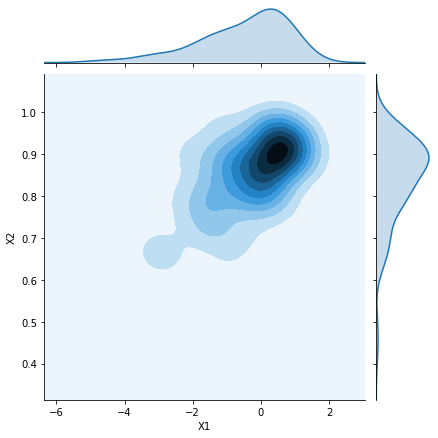

In [31]:
data = np.load("data.npy")
h = sns.jointplot(data[0], data[1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2');

In [55]:
class Copula(object):
    
    def __init__(self):
        pass
    
    def to_uniform(self, samples, mapping):
        return mapping.cdf(samples)


    def joint_to_gaussian(self, X):

        gumbel = stats.distributions.gumbel_l()
        beta = stats.distributions.beta(a=10, b=2)

        u1 = self.to_uniform(X[0], gumbel)
        u2 = self.to_uniform(X[1], beta)

        norm = stats.distributions.norm()

        g1 = norm.ppf(u1)
        g2 = norm.ppf(u2)

        return (g1, g2)


    def compute_covariant(self, G):
        n_samples = G[0].shape[0]

        mu_X1 = np.mean(G[0])
        mu_X2 = np.mean(G[1])

        # manually calculate X1/X1 variance, X2/X2 variance, and X1/X2 variance
        a = np.dot((G[0] - mu_X1), (G[0] - mu_X2))/n_samples
        b = np.dot((G[0] - mu_X1), (G[1] - mu_X2))/n_samples
        d = np.dot((G[1] - mu_X2), (G[1] - mu_X2))/n_samples

        recovered_covariant = [[a, b], [b, d]]
        return recovered_covariant

    def fit(self, X):
        G = self.joint_to_gaussian(X)
        C = self.compute_covariant(G)
        self.gaussian = stats.multivariate_normal(mean=[0, 0], cov=C)
        return self
    
    
    def sample(self, k):
        X = self.gaussian.rvs(k)

        # to unfirom
        norm = stats.norm()
        U = norm.cdf(X)

        m1 = stats.gumbel_l()
        m2 = stats.beta(a=10, b=2)

        Y0 = m1.ppf(U[:, 0])
        Y1 = m2.ppf(U[:, 1])

        return (Y0, Y1)

In [56]:
Generator = Copula()

In [57]:
Generator.fit(X)

In [58]:
A, B = Generator.sample(1000)

In [ ]:
sns.jointplot(A, B, kind='kde', stat_func=None);